In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/cybersecurity_attacks.csv")

In [ ]:
df.head(5)

Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken  \
0  Qui natus odio asperiores nam. Optio nobis ius...  ...       Logged   
1  Aperiam quos modi officiis veritatis rem. Omni...  ...      Blocked   
2  Perferendis sapiente vitae soluta. Hic delectu...  ...      Ignored   
3  Totam maxime beatae expedita explicabo porro l...  ...      Blocked   
4  Odit nesciunt dolorem nisi iste iusto. Animi v...  ...      Blocked   

   Severity Level User Information  \
0             Low    Reyansh Dugal   
1             Low       Sumer Rana   
2             Low     Himmat Karpe   
3          Medium       Fateh Kibe   
4             Low     Dhanush Chad   

                                  Device Information Network Segment  \
0  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...       Segment A   
1  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...       Segment B   
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...       Segment C   
3  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...       Segment B   
4  Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...       Segment C   

    Geo-location Data Proxy Information Firewall Logs IDS/IPS Alerts  \
0  Jamshedpur, Sikkim      150.9.97.135      Log Data            NaN   
1  Bilaspur, Nagaland               NaN      Log Data            NaN   
2   Bokaro, Rajasthan    114.133.48.179      Log Data     Alert Data   
3  Jaunpur, Rajasthan               NaN           NaN     Alert Data   
4  Anantapur, Tripura     149.6.110.119           NaN     Alert Data   

  Log Source  
0     Server  
1   Firewall  
2   Firewall  
3   Firewall  
4   Firewall  

[5 rows x 25 columns]

In [ ]:
# Name of Columns
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [ ]:
# Shape of data
print(f"There are {df.shape[0]}, row and {df.shape[1]} columns in the dataset")

There are 40000, row and 25 columns in the dataset


In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Attack Type                   0
Geo-location Data             0
Network Segment               0
Device Information            0
User Information              0
Severity Level                0
Action Taken                  0
Attack Signature              0
Timestamp                     0
Source IP Address             0
Anomaly Scores                0
Payload Data                  0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Source Port                   0
Destination IP Address        0
Log Source                    0
dtype: int64

In [ ]:
# Determine recent activity
df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(lambda x: 'yes' if x == 'Alert Triggered' else 'no')

df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 'No Detection' if pd.isna(x) else x)

df['Proxy Information'] = df['Proxy Information'].apply(lambda x: 'No proxy' if pd.isna(x) else x)

df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 'No Data' if pd.isna(x) else x)

df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 'No Data' if pd.isna(x) else x)

In [ ]:
#check sum of missing values
df.isnull().sum().sort_values(ascending=False)
#All Missing Values are removed.

Timestamp                 0
Attack Type               0
IDS/IPS Alerts            0
Firewall Logs             0
Proxy Information         0
Geo-location Data         0
Network Segment           0
Device Information        0
User Information          0
Severity Level            0
Action Taken              0
Attack Signature          0
Alerts/Warnings           0
Source IP Address         0
Anomaly Scores            0
Malware Indicators        0
Payload Data              0
Traffic Type              0
Packet Type               0
Packet Length             0
Protocol                  0
Destination Port          0
Source Port               0
Destination IP Address    0
Log Source                0
dtype: int64

In [ ]:
#Explore the Device Information Column¶
df['Device Information'].value_counts()

Device Information
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0)                                                                                       35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1)                                                                                           34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0)                                                                                           33
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0)                                                                                       31
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1)                                                                                       31
                                                                                                                                                      ..
Mozilla/5.0 (Macintosh; PPC Mac OS X 10_9_2; rv:1.9.2.20) Gecko/6474-09-17 07:53:12 Firefox/3.6.9                                                      1
Mozilla/5.0 (iPhone; CPU iPhone OS 14_2 like Mac OS X) AppleWebKit/535.0 (KHTML, like Gecko) CriOS/19.0.850.0 Mobile/88P921 Safari/535.0               1
Mozilla/5.0 (Windows NT 5.0; km-KH; rv:1.9.2.20) Gecko/7799-03-13 07:30:55 Firefox/3.8                                                                 1
Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gecko/6248-04-01 13:49:59 Firefox/3.8                                                                       1
Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like Mac OS X; tg-TJ) AppleWebKit/534.33.5 (KHTML, like Gecko) Version/4.0.5 Mobile/8B116 Safari/6534.33.5     1
Name: count, Length: 32104, dtype: int64

In [ ]:
# Extract 'Device'
df['Browser'] = df['Device Information'].str.split('/').str[0]

#We've created the Browser column.
df['Browser']

0        Mozilla
1        Mozilla
2        Mozilla
3        Mozilla
4        Mozilla
          ...   
39995    Mozilla
39996    Mozilla
39997    Mozilla
39998    Mozilla
39999    Mozilla
Name: Browser, Length: 40000, dtype: object

In [ ]:
import re
# OS and device patterns to search for
patterns = [
    r'Windows',
    r'Linux',
    r'Android',
    r'iPad',
    r'iPod',
    r'iPhone',
    r'Macintosh',
]

def extract_device_or_os(user_agent):
    for pattern in patterns:
        match = re.search(pattern, user_agent, re.I)  # re.I makes the search case-insensitive
        if match:
            return match.group()
    return 'Unknown'  # Return 'Unknown' if no patterns match

# Extract device or OS
df['Device/OS'] = df['Device Information'].apply(extract_device_or_os)

# Display the extracted device or OS
df['Device/OS']

0          Windows
1          Windows
2          Windows
3        Macintosh
4          Windows
           ...    
39995         iPad
39996      Windows
39997      Windows
39998        Linux
39999         iPod
Name: Device/OS, Length: 40000, dtype: object

In [ ]:
#We've created the Device/OS column.
df['Browser'].value_counts()

Browser
Mozilla    31951
Opera       8049
Name: count, dtype: int64

In [ ]:
df['Device/OS'].value_counts()

Device/OS
Windows      17953
Linux         8840
Macintosh     5813
iPod          2656
Android       1620
iPhone        1567
iPad          1551
Name: count, dtype: int64

In [ ]:
#Dropping the Device Information Column
df = df.drop('Device Information', axis = 1)

In [ ]:
df['Device/OS'].value_counts()

Device/OS
Windows      17953
Linux         8840
Macintosh     5813
iPod          2656
Android       1620
iPhone        1567
iPad          1551
Name: count, dtype: int64

In [ ]:
def extract_time_features(df, Timestamp):
    # Convert timestamp column to datetime if it's not already
    df[Timestamp] = pd.to_datetime(df[Timestamp])

    # Extract time features
    df['Year'] = df[Timestamp].dt.year
    df['Month'] = df[Timestamp].dt.month
    df['Day'] = df[Timestamp].dt.day
    df['Hour'] = df[Timestamp].dt.hour
    df['Minute'] = df[Timestamp].dt.minute
    df['Second'] = df[Timestamp].dt.second
    df['DayOfWeek'] = df[Timestamp].dt.dayofweek

    return df

In [ ]:
# Call the function and store the result in a new DataFrame
new_df = extract_time_features(df, 'Timestamp')

# Check if new columns are created
print(new_df.head())

            Timestamp Source IP Address Destination IP Address  Source Port  \
0 2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1 2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2 2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3 2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4 2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Log Source  Browser  \
0  Qui natu

In [ ]:
df.head().T

0  \
Timestamp                                             2023-05-30 06:33:58   
Source IP Address                                           103.216.15.12   
Destination IP Address                                       84.9.164.252   
Source Port                                                         31225   
Destination Port                                                    17616   
Protocol                                                             ICMP   
Packet Length                                                         503   
Packet Type                                                          Data   
Traffic Type                                                         HTTP   
Payload Data            Qui natus odio asperiores nam. Optio nobis ius...   
Malware Indicators                                           IoC Detected   
Anomaly Scores                                                      28.67   
Alerts/Warnings                                                        no   
Attack Type                                                       Malware   
Attack Signature                                          Known Pattern B   
Action Taken                                                       Logged   
Severity Level                                                        Low   
User Information                                            Reyansh Dugal   
Network Segment                                                 Segment A   
Geo-location Data                                      Jamshedpur, Sikkim   
Proxy Information                                            150.9.97.135   
Firewall Logs                                                    Log Data   
IDS/IPS Alerts                                                    No Data   
Log Source                                                         Server   
Browser                                                           Mozilla   
Device/OS                                                         Windows   
Year                                                                 2023   
Month                                                                   5   
Day                                                                    30   
Hour                                                                    6   
Minute                                                                 33   
Second                                                                 58   
DayOfWeek                                                               1   

                                                                        1  \
Timestamp                                             2020-08-26 07:08:30   
Source IP Address                                          78.199.217.198   
Destination IP Address                                     66.191.137.154   
Source Port                                                         17245   
Destination Port                                                    48166   
Protocol                                                             ICMP   
Packet Length                                                        1174   
Packet Type                                                          Data   
Traffic Type                                                         HTTP   
Payload Data            Aperiam quos modi officiis veritatis rem. Omni...   
Malware Indicators                                           IoC Detected   
Anomaly Scores                                                       51.5   
Alerts/Warnings                                                        no   
Attack Type                                                       Malware   
Attack Signature                                          Known Pattern A   
Action Taken                                                      Blocked   
Severity Level                                                        Low   
User Information                                               Sume

In [ ]:
df.describe(include = 'object').T

count unique  \
Source IP Address       40000  40000   
Destination IP Address  40000  40000   
Protocol                40000      3   
Packet Type             40000      2   
Traffic Type            40000      3   
Payload Data            40000  40000   
Malware Indicators      40000      2   
Alerts/Warnings         40000      2   
Attack Type             40000      3   
Attack Signature        40000      2   
Action Taken            40000      3   
Severity Level          40000      3   
User Information        40000  32389   
Network Segment         40000      3   
Geo-location Data       40000   8723   
Proxy Information       40000  20149   
Firewall Logs           40000      2   
IDS/IPS Alerts          40000      2   
Log Source              40000      2   
Browser                 40000      2   
Device/OS               40000      7   

                                                                      top  \
Source IP Address                                           103.216.15.12   
Destination IP Address                                       84.9.164.252   
Protocol                                                             ICMP   
Packet Type                                                       Control   
Traffic Type                                                          DNS   
Payload Data            Qui natus odio asperiores nam. Optio nobis ius...   
Malware Indicators                                           IoC Detected   
Alerts/Warnings                                                        no   
Attack Type                                                          DDoS   
Attack Signature                                          Known Pattern A   
Action Taken                                                      Blocked   
Severity Level                                                     Medium   
User Information                                         Ishaan Chaudhari   
Network Segment                                                 Segment C   
Geo-location Data                                    Ghaziabad, Meghalaya   
Proxy Information                                                No proxy   
Firewall Logs                                                    Log Data   
IDS/IPS Alerts                                                    No Data   
Log Source                                                       Firewall   
Browser                                                           Mozilla   
Device/OS                                                         Windows   

                         freq  
Source IP Address           1  
Destination IP Address      1  
Protocol                13429  
Packet Type             20237  
Traffic Type            13376  
Payload Data                1  
Malware Indicators      20000  
Alerts/Warnings         20067  
Attack Type             13428  
Attack Signature        20076  
Action Taken            13529  
Severity Level          13435  
User Information            6  
Network Segment         13408  
Geo-location Data          16  
Proxy Information       19851  
Firewall Logs           20039  
IDS/IPS Alerts          20050  
Log Source              20116  
Browser                 31951  
Device/OS               17953

In [ ]:
# Checking the Day Column ploting with plotly
plt = px.histogram(df, x = 'Day', color = 'Malware Indicators', title = 'Number of Malware Attacks by Day')
plt.show()

In [ ]:
# month Distribution
plt = px.histogram(df, x = 'Month', title = 'Month')
plt.show()

In [ ]:
# Checking the Month Column ploting with plotly
plt = px.histogram(df, x = 'Month', color = 'Malware Indicators', title = 'Number of Malware Attacks by Month')
plt.show()

In [ ]:
# Year Distrition
plt = px.histogram(df, x='Year', title = 'Year')
plt.show()

In [ ]:
# Checking the Protocol distribution with Bar Chart Using Plotly
plt = px.histogram(df, x = 'Protocol', color = 'Malware Indicators', title = 'Number of Malware Attacks by Protocol')
plt.show()

In [ ]:
# Traffic Distribution
plt = px.pie(df, names = 'Traffic Type', title = 'Traffic Distribution')
plt.show()

In [ ]:
# Ploting the Traffic Type distribution with Bar Chart Using Plotly
plt = px.histogram(df, x = 'Traffic Type', color = 'Malware Indicators', title = 'Number of Malware Attacks by Traffic Type')
plt.show()

In [ ]:
# Attack Type Distribution
plt = px.pie(df, names = 'Attack Type', title = 'Attack Type Distribution')
plt.show()

In [ ]:
# Checking the attack types distribution with Bar Chart Using Plotly
plt = px.histogram(df, x='Attack Type', color='Traffic Type', title='Number of Malware Attacks by Attack Type')
plt.show()

In [ ]:
# Browsers Distribution
plt = px.pie(df, names = 'Browser', title = 'Browser Distribution')
plt.show()

In [ ]:
# Platform Distribution
plt = px.pie(df, names = 'Device/OS', title = 'Platform Distribution')
plt.show()

In [ ]:
# Checking the Browser and Devices with Attack Type distribution with Bar Chart Using Plotly
plt = px.histogram(df, x= 'Device/OS', color = 'Attack Type', title = 'Number of Malware Attacks by Browser and Devices')
plt.show()

In [ ]:
dns_filter = df['Traffic Type'] == 'DNS'

filtered_df = df[dns_filter]

In [ ]:
# Filter for DNS traffic
dns_filter = df['Traffic Type'].str.strip().str.upper() == 'DNS'
filtered_df = df[dns_filter]
# Now 'filtered_df' contains only rows with DNS traffic.

In [ ]:
filtered_df = df[df['Traffic Type'] == 'DNS']
print(filtered_df.shape)

(13376, 33)


In [ ]:
# Convert 'Timestamp' to datetime format
filtered_df['Timestamp'] = pd.to_datetime(filtered_df['Timestamp'])

# Group by time intervals ( 1-minute bins) and count queries
query_volume1 = filtered_df.set_index('Timestamp').resample('1Min').size()

print(query_volume1.head())

Timestamp
2020-01-01 00:43:00    1
2020-01-01 00:44:00    0
2020-01-01 00:45:00    0
2020-01-01 00:46:00    0
2020-01-01 00:47:00    0
Freq: min, dtype: int64


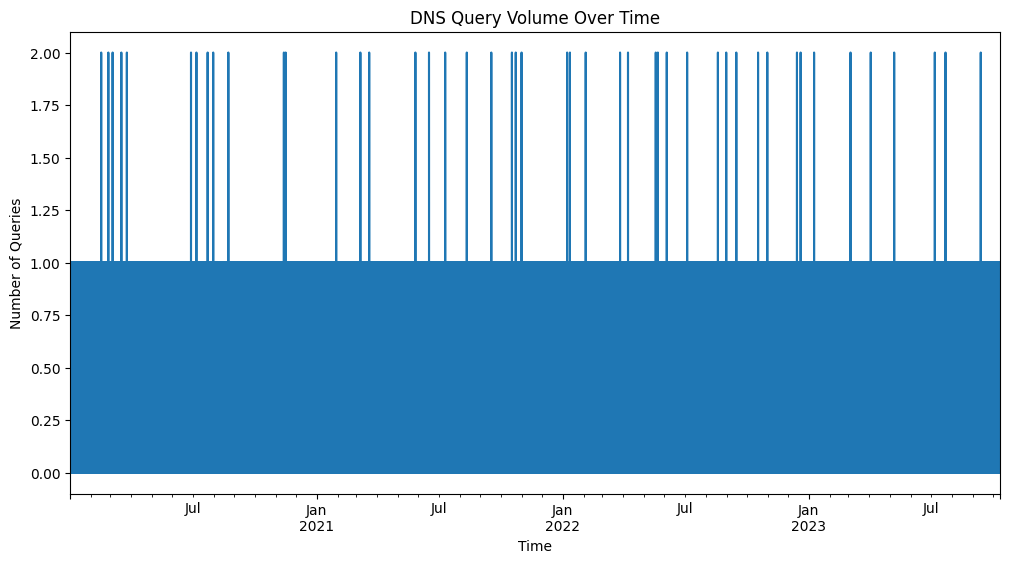

Timestamp
2020-01-01 00:43:00    1
2020-01-01 00:44:00    0
2020-01-01 00:45:00    0
2020-01-01 00:46:00    0
2020-01-01 00:47:00    0
Freq: min, dtype: int64


In [ ]:
# Plot the query volume over time
import matplotlib.pyplot as plt

query_volume1.plot(figsize=(12, 6), title='DNS Query Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Queries')
plt.show()

# show the first few records
print(query_volume1.head())

In [ ]:
query_volume = filtered_df.set_index('Timestamp').resample('15Min').size()
print(query_volume.head())

Timestamp
2020-01-01 00:30:00    1
2020-01-01 00:45:00    0
2020-01-01 01:00:00    1
2020-01-01 01:15:00    0
2020-01-01 01:30:00    0
Freq: 15min, dtype: int64


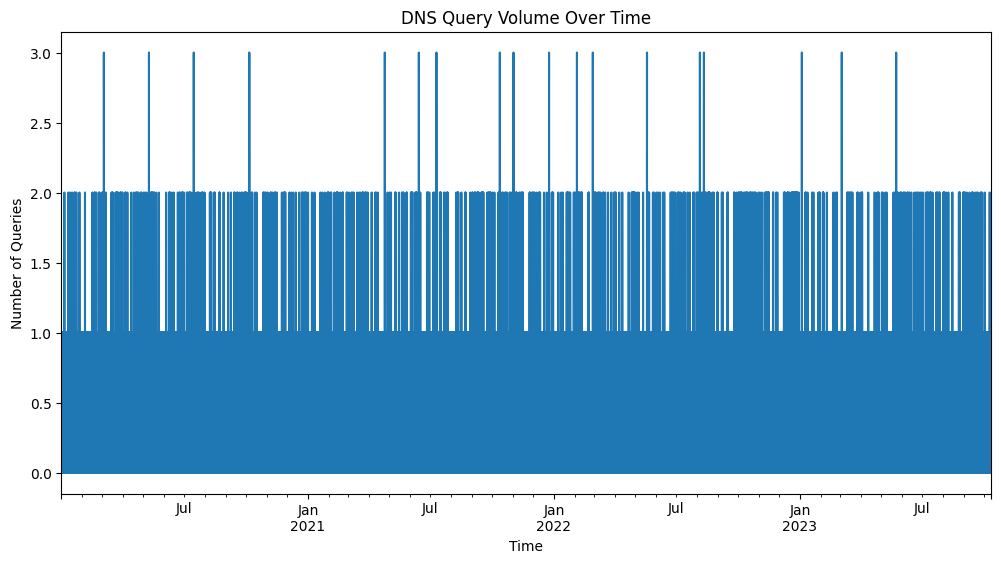

Timestamp
2020-01-01 00:30:00    1
2020-01-01 00:45:00    0
2020-01-01 01:00:00    1
2020-01-01 01:15:00    0
2020-01-01 01:30:00    0
Freq: 15min, dtype: int64


In [ ]:
# Plot the query volume over time
import matplotlib.pyplot as plt

query_volume.plot(figsize=(12, 6), title='DNS Query Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Queries')
plt.show()

# show the first few records
print(query_volume.head())

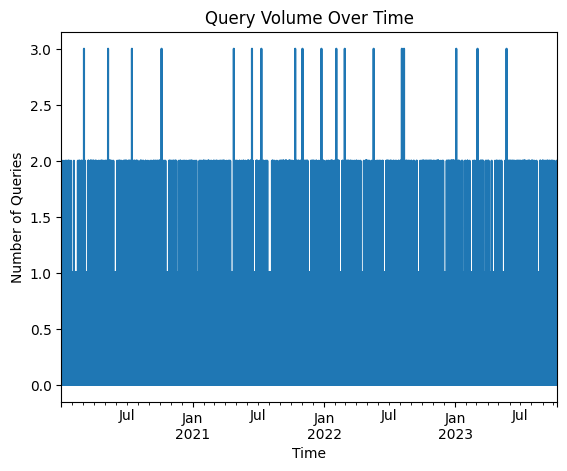

In [ ]:
import matplotlib.pyplot as plt

query_volume.plot()
plt.title('Query Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Queries')
plt.show()

In [ ]:
# Ensure 'Timestamp' is in datetime format
filtered_df['TTL'] = pd.to_datetime(filtered_df['Timestamp'])

# Create a reference timestamp  in the dataset
start_timestamp = filtered_df['TTL'].min()

# Calculate the difference between each timestamp and the reference timestamp in seconds
filtered_df['TimeSinceStart'] = (filtered_df['TTL'] - start_timestamp).dt.total_seconds()

# Print out the TimeSinceStart values to inspect
print("TimeSinceStart values:")
print(filtered_df[['Timestamp', 'TimeSinceStart']])

# Now check the range of TimeSinceStart
print(f"Min TimeSinceStart: {filtered_df['TimeSinceStart'].min()}")
print(f"Max TimeSinceStart: {filtered_df['TimeSinceStart'].max()}")

# Calculate the TTL based on the time difference and your conditions
# Ensure TTL does not go negative, and if TimeSinceStart is small, TTL should not drop to zero
filtered_df['TTL'] = 300 - filtered_df['TimeSinceStart']  # 300 seconds = 5 minutes
# Ensure TTL is not negative
filtered_df['TTL'] = filtered_df['TTL'].clip(lower=0)

# Drop the temporary column
filtered_df = filtered_df.drop('TimeSinceStart', axis=1)

TimeSinceStart values:
                Timestamp  TimeSinceStart
4     2023-07-16 13:11:07     111673660.0
6     2022-05-16 17:55:43      74884336.0
7     2023-02-12 07:13:17      98346590.0
12    2020-09-30 21:35:31      23662324.0
14    2023-02-01 13:17:17      97418030.0
...                   ...             ...
39986 2023-01-09 02:03:32      95390405.0
39987 2022-11-05 11:34:58      89808691.0
39990 2022-03-17 12:32:16      69680929.0
39991 2020-11-14 05:41:54      27493107.0
39997 2022-03-31 01:45:49      70851742.0

[13376 rows x 2 columns]
Min TimeSinceStart: 0.0
Max TimeSinceStart: 119213456.0


In [ ]:
#Check if the timestamps have regular or irregular intervals
# Ensure Timestamp is datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Find time difference between consecutive queries
df['TimeDiff'] = df['Timestamp'].diff()
# Check time gap distribution
print(df['TimeDiff'].describe())

count                          39999
mean       0 days 00:04:47.776044401
std      561 days 04:14:28.571038168
min             -1375 days +14:27:54
25%       -403 days +09:53:11.500000
50%                  0 days 23:49:24
75%         402 days 15:03:32.500000
max               1377 days 22:21:12
Name: TimeDiff, dtype: object


In [ ]:
#Check if the domain names in your DNS traffic are unique or repetitive
# Assuming 'Source IP' or 'Destination IP' contains domain information
domain_counts = df['Source IP Address'].value_counts()
print(df['Source IP Address'].nunique())  # Number of unique source IP addresses
# Display top 10 most frequent domains
print(domain_counts.head(10))

40000
Source IP Address
103.216.15.12      1
74.225.47.66       1
147.178.224.232    1
119.183.250.156    1
80.60.140.131      1
197.184.240.174    1
81.194.89.127      1
92.144.85.155      1
40.119.100.114     1
37.220.27.135      1
Name: count, dtype: int64


In [ ]:
import pandas as pd
import random
import time

# Generate synthetic DNS traffic data
data = []
# Generate 100 rows of DNS traffic data
for _ in range(100):
    # Random timestamps
    timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(random.randint(1, 1000000000)))
    # Random DNS queries
    query = random.choice(['example.com', 'google.com', 'github.com'])
    # Random DNS responses
    response = random.choice(['192.168.1.1', '172.217.5.68', '140.82.121.3'])
    # Random TTL values between 100 seconds and 1 hour
    ttl = random.randint(100, 3600)
    data.append([timestamp, query, response, ttl, 'DNS'])  # Append DNS traffic data

# Create a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Query', 'Response', 'TTL', 'Traffic Type'])

# Now filter for DNS traffic
filtered_df = df[df['Traffic Type'] == 'DNS']

# Display the shape of the filtered DNS traffic
print(filtered_df.shape)
print(filtered_df.head())

(100, 5)
             Timestamp        Query      Response   TTL Traffic Type
0  1974-01-19 10:23:19   google.com  140.82.121.3   433          DNS
1  1993-03-20 06:45:07  example.com  172.217.5.68   586          DNS
2  1982-01-08 10:42:47  example.com   192.168.1.1  2598          DNS
3  1997-07-26 05:34:50   google.com  140.82.121.3   902          DNS
4  1985-04-12 22:27:07  example.com   192.168.1.1  1288          DNS


In [ ]:
# Summary of TTL values
print(filtered_df['TTL'].describe())

count     100.000000
mean     1727.910000
std       967.384604
min       245.000000
25%       890.750000
50%      1707.000000
75%      2450.250000
max      3543.000000
Name: TTL, dtype: float64


Most common queries:
 Query
google.com     42
github.com     33
example.com    25
Name: count, dtype: int64


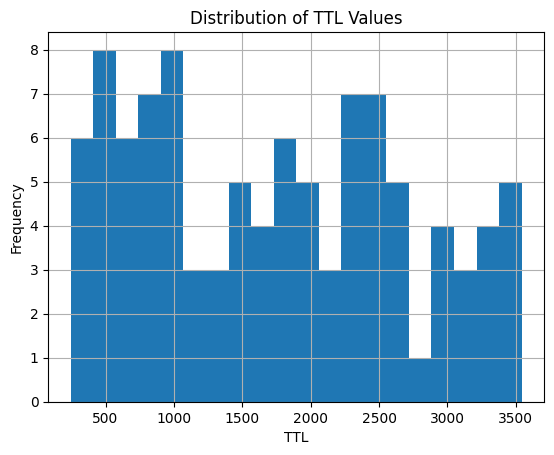

In [ ]:
# Find the most common DNS queries
most_common_queries = filtered_df['Query'].value_counts()
print("Most common queries:\n", most_common_queries)

# Check for the distribution of TTL values
import matplotlib.pyplot as plt

filtered_df['TTL'].hist(bins=20)
plt.title('Distribution of TTL Values')
plt.xlabel('TTL')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import numpy as np
from collections import Counter

# Use 'Query' column for entropy calculation
query_values = filtered_df['Query']

# Calculate frequency distribution of query values
query_counts = Counter(query_values)

# Calculate the total number of queries
total_queries = len(query_values)

# Calculate the entropy
entropy = -sum((count / total_queries) * np.log2(count / total_queries)
               for count in query_counts.values())

print(f"Query Entropy: {entropy}")

Query Entropy: 1.5534687653756747


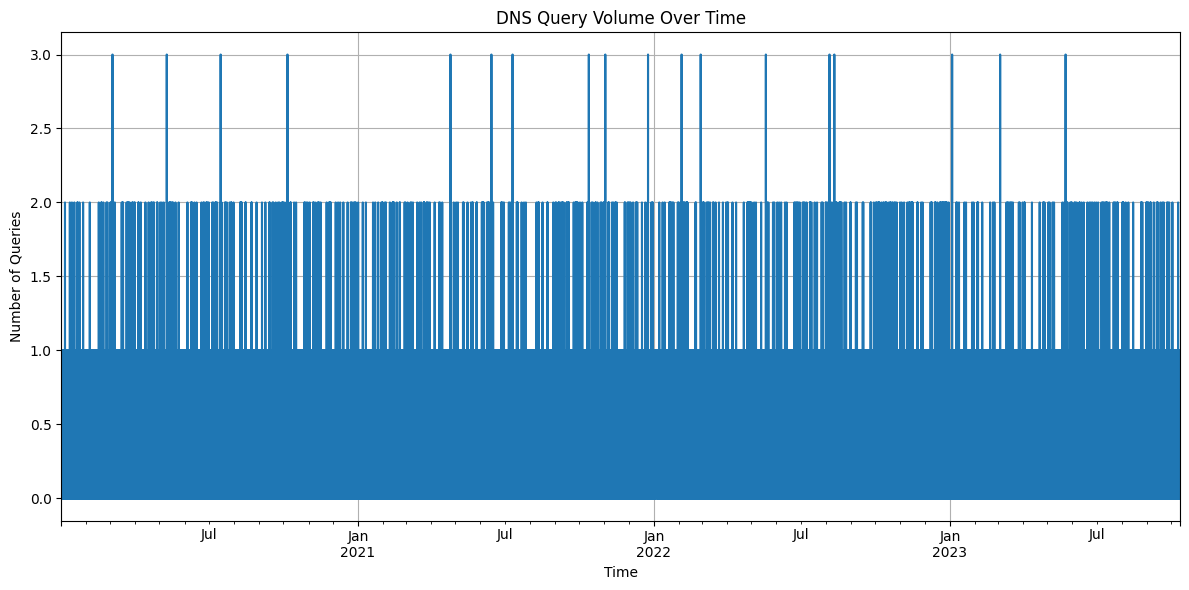

In [ ]:
import matplotlib.pyplot as plt

query_volume.plot(figsize=(12, 6), title='DNS Query Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Queries')
plt.grid(True)
plt.tight_layout()
plt.show()

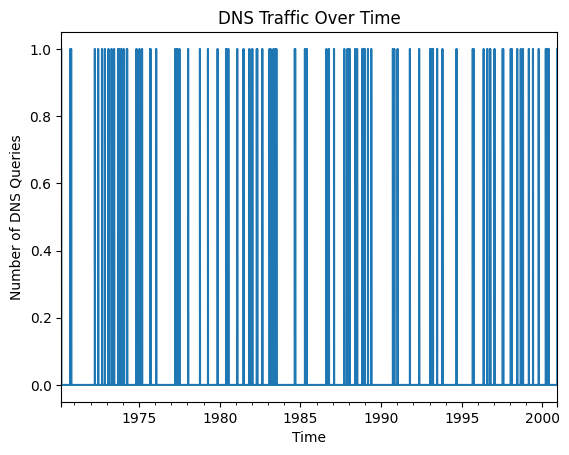

In [ ]:
# Convert 'Timestamp' column to datetime format if it's not already
filtered_df['Timestamp'] = pd.to_datetime(filtered_df['Timestamp'])

# Set 'Timestamp' as the index
filtered_df.set_index('Timestamp', inplace=True)

# Resample the data to get the number of DNS queries per hour
dns_queries_per_hour = filtered_df.resample('H').size()

# Plot DNS traffic over time
dns_queries_per_hour.plot(kind='line', title='DNS Traffic Over Time')
plt.xlabel('Time')
plt.ylabel('Number of DNS Queries')
plt.show()

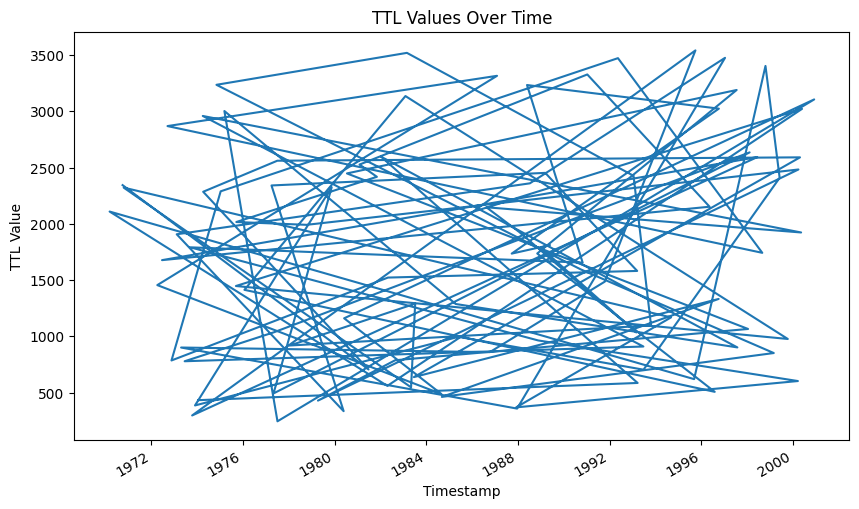

In [ ]:
# Plot TTL values over time for DNS queries
filtered_df['TTL'].plot(kind='line', title='TTL Values Over Time', figsize=(10, 6))
plt.xlabel('Timestamp')
plt.ylabel('TTL Value')
plt.show()

Detected anomalies:                            Query      Response   TTL Traffic Type  Anomaly
Timestamp                                                                 
1977-07-04 09:36:23  example.com   192.168.1.1   245          DNS       -1
1972-09-15 20:28:34   github.com  140.82.121.3  2870          DNS       -1
1995-09-27 03:32:08   google.com  172.217.5.68  3543          DNS       -1
1998-10-17 05:42:38   github.com  140.82.121.3  3405          DNS       -1
1983-02-25 12:57:04  example.com   192.168.1.1  3521          DNS       -1


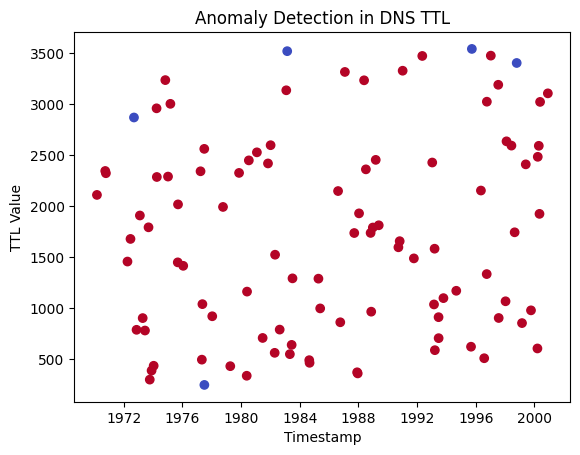

In [ ]:
from sklearn.ensemble import IsolationForest

# Select TTL as the feature for anomaly detection
X = filtered_df[['TTL']]

# Train an Isolation Forest model
model = IsolationForest(contamination=0.05)  # Assume 5% of data are anomalies
filtered_df['Anomaly'] = model.fit_predict(X)

# Mark anomalies as -1 and normal points as 1
anomalies = filtered_df[filtered_df['Anomaly'] == -1]
print(f"Detected anomalies: {anomalies}")

# Plot anomalies
# Reset the index to make 'Timestamp' a column again
filtered_df = filtered_df.reset_index()
plt.scatter(filtered_df['Timestamp'], filtered_df['TTL'], c=filtered_df['Anomaly'], cmap='coolwarm')
plt.title('Anomaly Detection in DNS TTL')
plt.xlabel('Timestamp')
plt.ylabel('TTL Value')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
filtered_df = extract_time_features(filtered_df, 'Timestamp')
# Drop the original Timestamp column
filtered_df = filtered_df.drop(columns=['Timestamp'])

In [ ]:
# Encode Query, Response, and Traffic Type using LabelEncoder
label_enc_query = LabelEncoder()
filtered_df['Query_encoded'] = label_enc_query.fit_transform(filtered_df['Query'])

label_enc_response = LabelEncoder()
filtered_df['Response_encoded'] = label_enc_response.fit_transform(filtered_df['Response'])

label_enc_traffic = LabelEncoder()
filtered_df['Traffic_Type_encoded'] = label_enc_traffic.fit_transform(filtered_df['Traffic Type'])

# Drop original categorical columns
filtered_df = filtered_df.drop(columns=['Query', 'Response', 'Traffic Type'])

In [ ]:
scaler = StandardScaler()
filtered_df['TTL_normalized'] = scaler.fit_transform(filtered_df[['TTL']])

# Drop the original TTL column
filtered_df = filtered_df.drop(columns=['TTL'])

In [ ]:
# iloc is to slice the DataFrame in Pandas , iloc[rows,cols]
# x has all features
# y has only the last column [status] (labeled data)
X=filtered_df.iloc[:,:-1]
y=filtered_df.iloc[:,-1:]

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")


Training Features Shape: (60, 11)
Testing Features Shape: (40, 11)
Training Labels Shape: (60,)
Testing Labels Shape: (40,)


In [ ]:
print(y_binned.value_counts())

TTL_normalized
0    27
3    20
1    19
2    18
4    16
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [ ]:
# Assuming 'Anomaly' is the target variable
target_column = 'Anomaly'

# Feature columns (excluding target and any previously removed columns)
feature_columns = [col for col in filtered_df.columns if col not in [target_column, 'Query', 'Response', 'Traffic Type']]  # Exclude removed columns

In [ ]:
# Encode the target variable
label_enc_target = LabelEncoder()
filtered_df[target_column] = label_enc_target.fit_transform(filtered_df[target_column])

# Selecting feature columns and target
X = filtered_df[feature_columns]
y = filtered_df[target_column]

In [ ]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# the model RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature importance
print("\nFeature Importance:")
for f in range(X_train.shape[1]):
    print(f"{filtered_df.columns[indices[f]]}: {importances[indices[f]]:.4f}")

Accuracy: 0.95

Feature Importance:
Traffic_Type_encoded: 0.4357
Hour: 0.0874
Minute: 0.0872
Day: 0.0745
Month: 0.0727
Year: 0.0604
Second: 0.0497
Anomaly: 0.0486
Query_encoded: 0.0418
DayOfWeek: 0.0418
Response_encoded: 0.0000


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Build the ANN model
model = Sequential()

# Add input layer (input_dim = number of features in the dataset)
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add output layer (for binary classification, use 'sigmoid' activation)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

# Make predictions
y_pred = model.predict(X_test_scaled)
# Convert probabilities to binary (0 or 1)
y_pred = (y_pred > 0.5)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 0.9719 - loss: 0.0645 - val_accuracy: 0.9500 - val_loss: 0.2579
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9641 - loss: 0.0724 - val_accuracy: 0.9500 - val_loss: 0.2607
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9758 - loss: 0.0578 - val_accuracy: 0.9500 - val_loss: 0.2637
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9719 - loss: 0.0560 - val_accuracy: 0.9500 - val_loss: 0.2666
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9836 - loss: 0.0373 - val_accuracy: 0.9500 - val_loss: 0.2696
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9758 - loss: 0.0440 - val_accuracy: 0.9500 - val_loss: 0.2727
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9836 - loss: 0.0386 - val_accuracy: 0.9500 - val_loss: 0.2757
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9719 - loss: 0.0528 - val_accuracy: 0.9500 - val_loss: 0.2786

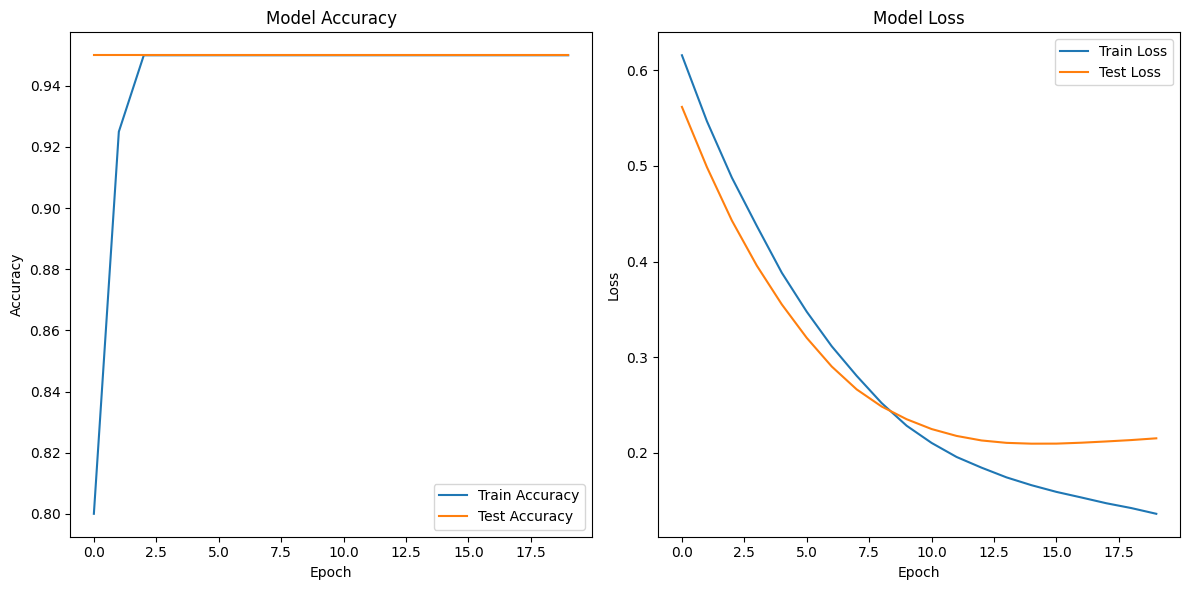

In [ ]:
# Plotting the loss and accuracy during training
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Train an SVM classifier
svm_model = SVC(kernel='linear', random_state=30)

# Fit the model on training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")


SVM Accuracy: 0.95


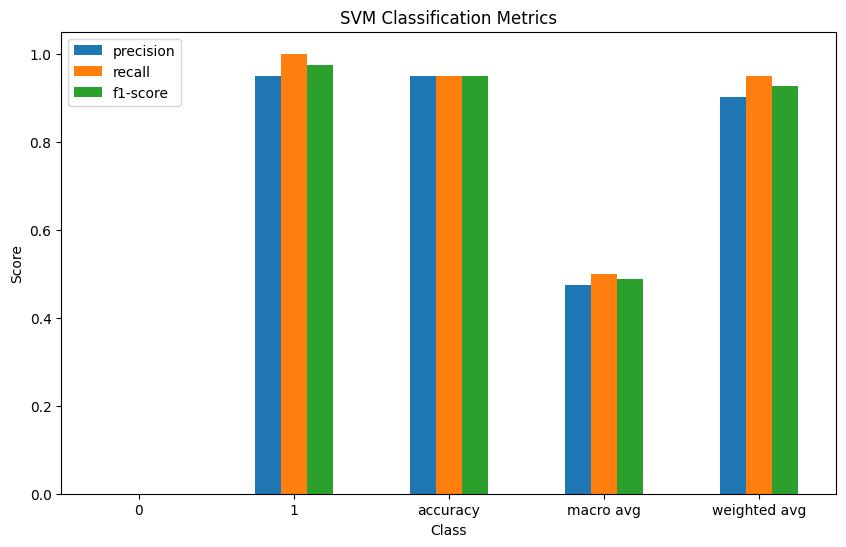

In [ ]:
# Get classification report as a DataFrame
report = classification_report(y_test, y_pred_svm, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, F1-score
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title("SVM Classification Metrics")
plt.xlabel("Class")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()